In [1]:
import pandas as pd
board_games = pd.read_csv("board_games.csv")
board_games.head(5)
board_games.shape
board_games = board_games.dropna()
# Remove rows with no reviews, where the users_rated column = 0
board_games = board_games[board_games["users_rated"] != 0]
board_games.head(5)


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


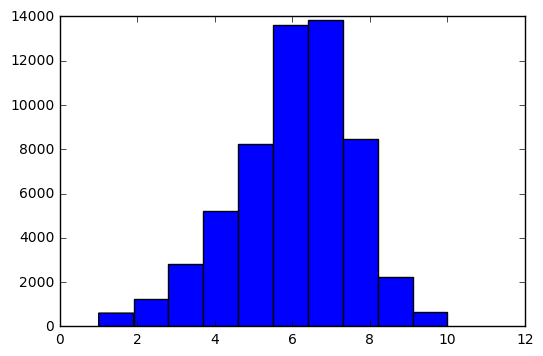

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(board_games["average_rating"])
plt.show()

The histogram of the average rating variable, show that most of their values are rounded to 6. There is a high amount of games that were rated in the range of scores between 6 and 8.

In the other hand, there are few extreme values such as 10 or 1 among the rating average. This show that the distribution of average_rating mainly concentrate around it's mean that is around 6.5. 

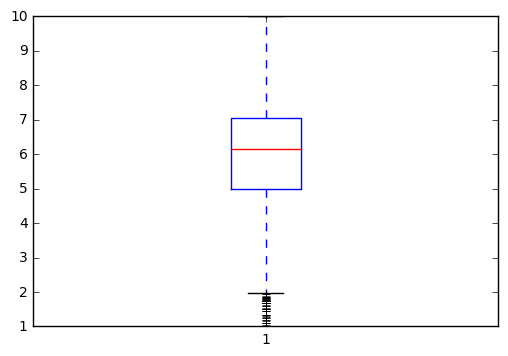

In [3]:
plt.boxplot(board_games["average_rating"])
plt.show()

The box and plot show that the median of the variable is 6 aproximately and the second and third quartile of the distribution are within 5 and 7. That means that the 50% of the rating average values fall into that range. 
This feature, can be observe in the histogram too, where the mayority of the values were concentrated around the value of 6. 

Is possible to observe that there is a group of values between 1 and 2, below the first quantile that are considered atypical data, because doesn´t fall in the body of the distribution. 

In [4]:
# Calculate the Standar Deviation of the average rating column
board_games["average_rating"].std()

1.5788299348332662

The standard deviation of the average rating values is 1.58 and means that there little variation around the mean value of the average_rating variable. 

In [5]:
board_games["average_rating"].mean()

6.016112849333889

The mean of the series is 6, also the series has a narrow standar deviation. These features cause that the majority of the values are concentrated around the mean. 

In [6]:
# Plotting Clusters 
# At first, I use the KMeans class to create clusters 
import numpy as np
from sklearn.cluster import KMeans

numeric_columns = board_games.drop(board_games.columns[[0,1,2]],axis=1) # Extract only the numeric columns of the board_games dataframe
kmeans_model = KMeans(n_clusters = 5)
cluster = kmeans_model.fit(numeric_columns) # Transform numeric columns in cluster distance space 
labels = kmeans_model.labels_ # Extract the labels attribute of each cluster and assing to the variable labels
cluster

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

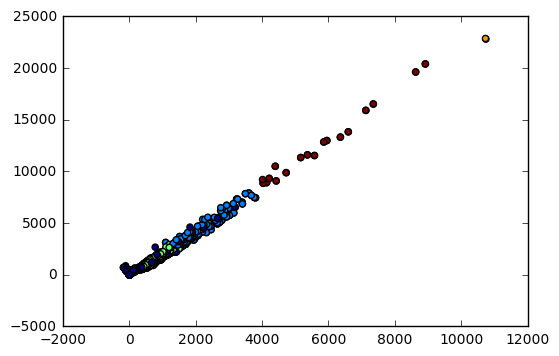

0        3806.296359
1        2662.195541
2        1979.243229
3        2467.201242
4        6360.675421
5        6598.986708
6        2991.732713
7        2655.662206
8        2795.416065
9        2792.273392
10       5580.305755
11       1152.445934
12        992.127904
13       2315.153568
14       2726.683881
15       1621.103150
16       2154.081042
17       1987.930732
18       5953.529588
19       3151.088482
20       1410.825956
21       3237.767121
22       1945.272206
23       4728.205226
24       2294.006601
25       2648.861422
26       1835.704201
27       3403.590974
28       3410.337148
29       2325.574743
            ...     
81134     128.529412
81160     123.411765
81162       6.176471
81176     134.364706
81177     134.364706
81178     134.164706
81179     134.348039
81180     134.348039
81181     134.294118
81184     133.823529
81188     123.588235
81190     134.941176
81192     125.764706
81193     125.558824
81195     122.470588
81198     124.117647
81199     127

In [7]:
# In this step, I will plot each cluster by calculating the mean and standard deviation of each row in numeric_columns 
# and visualize in a scatter plot 
game_mean = numeric_columns.apply(np.mean,axis=1)

game_std = numeric_columns.apply(np.std,axis=1)
plt.scatter(game_mean,game_std,c=labels)
plt.show()
game_mean

The result of the scatter plot tell that there are a strong correlation among the mean and standard deviation of all the values in each row. The mean of the value in a certain row, is correlated with the standard deviation of that row. The graph show that the clusters are concentrated within a mean between 0 and 4000 and a standard deviation between 0 an 10000. Only one cluster that is labeled with the green color has higher values of the mean and standard deviation than the others cluster. This means that for a certain cluster, there are rows in the dataset that  have higher values in some columns such as number of users that rated the game(user_rated), total owners, total wishers and total comments. 

In [8]:
# In order to predict the value of the variable average_rating is necessary to identify the variables with the highest 
# correlation to average_rating. For this purpose, first I observe the correlation between average_rating and the others variables
# Generate the correlations dataframe and secondly select the column average_rating in that daframe that show all the correlations

correlations = numeric_columns.corr()
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

It´s remarkably the correlation that the average_weight variable has with average_rating. The average_weight variable is a measure of the subjective valoration that users perform in terms of the accesibility of the game. If the game is difficult to understand, and is required more time to be able to play the game, the valoration is higher than in the case that the level of the game, is easy. This valoration about the complexity of the game, has a positive correlation with the average rating column. 

Secondly, we can find that the minage variable(min age to play the game) also has a positive correlation with average rating but this correlation is weakly respect the average_weight variable. In the next step I will remove columns seems to be derived from average_rating such as bayes_average_rating. In order to not cause overfitting, this variable has to be removed. 

In [9]:
# I will remove columns that don´t seem to correlate at all with the average rating variable and columns that 
# seem to be derived from the average rating.
df = numeric_columns.drop(numeric_columns[["bayes_average_rating","minplayers","maxplayers","playingtime","minplaytime","maxplaytime",]],axis=1)
df.head()

,yearpublished,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,2006.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [10]:
# Creating a Linear Regression Model to make predicctions of average rating variable 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

reg = LinearRegression() # Initialize the linear regression model


model = reg.fit(board_games[["average_weight","minage"]],board_games["average_rating"]) # Set the predictor columns and the target column that the model will use 
model.coef_ # show the coefficients of the predictors 
predictions = reg.predict(board_games[["average_weight","minage"]])
print(predictions)
# Calculate de error metric MSE

mse = mean_squared_error(board_games["average_rating"],predictions)
mse


[ 7.15311346  7.28359492  7.23487475 ...,  6.16936732  5.50785613
  6.12823178]


2.1476659364250037

The mean square error for this model is 2.15 that means that the average of the square differences between the true value of average_rating and the predicted value for this variable is 2.15.
This value can interpret as the variance of the model to predict the target. 

In [11]:
# In this step, I would split the board_games dataframe creating a train and test dataset and evaluate the performance
# of the model in the test dataset.

x = board_games[["average_weight","minage"]]
y = board_games[["average_rating"]]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)


board_games.shape
    

(56894, 20)

In [12]:
# Initialize the linear regression model, fit the model and calculated the mean squared error in the test set. 
lr = LinearRegression()
model = lr.fit(X_train,y_train) 
predictions = lr.predict(X_test)

mse = mean_squared_error(y_test,predictions)
mse


2.0975918970386283

In [13]:
# In this step, I take new variables and remove the minage variable from the model. 
# After reviewed the board game geek site to view some interesting variables that could be suitable for the model, I 
# choose the total_wanters and total_wishers variables for each game, that are seems to be correlated to the average_rating
# variable

x = board_games[["average_weight","total_wanters","total_wishers"]]
y = board_games["average_rating"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

In [14]:
# Initialize the linear regression model, fit the model and calculated the mean squared error in the test set. 
lr = LinearRegression()
model = lr.fit(X_train,y_train) 
predictions = lr.predict(X_test)

mse = mean_squared_error(y_test,predictions)
mse


2.166878339819184

In [15]:
# Create new features that could have a positive effect in predict the target variable
board_games["player_range"] = board_games["maxplayers"] - board_games["minplayers"]
board_games["playing_time_ranges"] = board_games["maxplaytime"] - board_games["minplaytime"]
board_games["average_number_ratings"] = board_games["total_owners"] / board_games["users_rated"]

In [16]:
x = board_games[["average_weight","player_range","average_number_ratings"]]
y = board_games["average_rating"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

In [17]:
# Initialize the linear regression model, fit the model and calculated the mean squared error in the test set. 
lr = LinearRegression()
model = lr.fit(X_train,y_train) 
predictions = lr.predict(X_test)

mse = mean_squared_error(y_test,predictions)
mse


2.111132443515646

In [18]:
# In this step, I would visualize each cluster on behalf the average_rating value in each one. For this I make a 
# dictionary called average_rating_per_cluster and get the mean of average_rating in each cluster. 

board_games["cluster"] = labels
board_games["cluster"].value_counts()
board_games[0:20]
clusters = board_games["cluster"].unique()
average_rating_per_cluster = {}

for cluster in clusters:
    unique_cluster = board_games[board_games["cluster"] == cluster]
    cluster_average_rating = unique_cluster["average_rating"].mean()
    average_rating_per_cluster[cluster] = cluster_average_rating
average_rating_per_cluster    
        


{0: 5.977028000145592,
 1: 7.336280134228191,
 2: 7.078618987500011,
 3: 6.4255949999999995,
 4: 7.553986857142857}

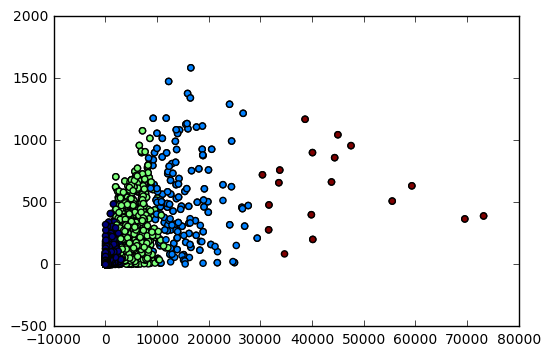

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight,player_range,playing_time_ranges,average_number_ratings,cluster
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,...,372,1219,5865,5347,2562,3.4785,0.0,0.0,1.324865,1
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,...,132,1586,6277,2526,1423,3.8939,3.0,90.0,1.148509,1
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,...,99,1476,5600,1700,777,3.7761,6.0,180.0,1.320449,1
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,...,362,1084,5075,3378,1642,4.1590,2.0,0.0,1.078908,1
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,...,795,861,5414,9173,5213,3.2943,3.0,60.0,1.112303,4
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,...,837,958,6402,9310,5065,3.6160,4.0,120.0,1.196606,4
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,...,680,627,3244,3202,1260,3.3103,0.0,0.0,1.595511,1
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,...,367,1116,5427,2861,1409,4.1292,3.0,0.0,1.478223,1
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,...,215,929,3681,3244,1176,3.0442,2.0,60.0,1.329668,1
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,...,273,1108,5581,3188,1486,3.6359,4.0,140.0,1.121077,1


In [19]:
# The clusters can visualized by the segmentation of total_owners and total_wanters of the games. 

owners = board_games["total_owners"]
wanters = board_games["total_wanters"]


plt.scatter(owners,wanters,c=labels)
plt.show()


board_games[0:15]


In [20]:
#Finally I will apply the K Nearest Neighboars algorithm to predict in which cluster a new game would fall using a set of 
# features of the game. If we have a great accuracy in this machine learning task, the game could be classify in a cluster 
# and have an idea of the average rating that will have as the dictionary that I construct show the average rating value
# for each cluster.
import numpy as np
from sklearn import neighbors


x = board_games[["average_weight","player_range","total_wanters"]] # The features would be all the variables except the cluster class
y = board_games["cluster"] # The cluster is the target value

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)


0.976008436594


The accuracy of the model show that 97,6% of the times the model predict the correct cluster that a new game will have. Knowing the cluster of the game, we can have an idea about the average rating of it. With this approach we will have an awareness of the possible value of the average rating for the game. 